In [15]:
import torch
import torch.nn as nn

In [7]:
# input1 = torch.randn(100, 128)
# input2 = torch.randn(100, 128)
input1 = torch.tensor([0.0,1.0, 0.0])
input2 = torch.tensor([0.0,-1.0, 1.0])
cos = nn.CosineSimilarity(dim=0, eps=1e-6)
output = cos(input1, input2)

In [8]:
output

tensor(-0.7071)

In [1]:
a = [1,2,3]

In [4]:
b = [x / sum(a) for x in a]

In [5]:
b

[0.16666666666666666, 0.3333333333333333, 0.5]

In [24]:
y = torch.tensor([1,2,3,4,5,0])

In [25]:
y[y==5] =9

In [26]:
y

tensor([1, 2, 3, 4, 9, 0])

In [8]:
import cma
import numpy as np

# Example objective function (Rosenbrock function)
def objective(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2  # Rosenbrock function

# Initial guess and step size
x0 = [2.0, 20]  # Starting point
sigma = 0.5      # Initial standard deviation

# Run CMA-ES optimization
es = cma.CMAEvolutionStrategy(x0, sigma)
es.optimize(objective)

# Best solution found
best_x, best_f = es.result.xbest, es.result.fbest
print("Optimal point:", best_x)
print("Function value at optimum:", best_f)


(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=300796, Thu Jan 30 11:46:32 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 1.260837423831868e+04 1.0e+00 5.31e-01  5e-01  6e-01 0:00.0


    2     12 1.009450979915790e+04 1.3e+00 6.16e-01  5e-01  8e-01 0:00.0
    3     18 2.541861729348199e+03 1.7e+00 7.44e-01  5e-01  1e+00 0:00.0
  100    600 2.181517843868159e+00 1.2e+02 9.23e+00  6e-02  3e-01 0:00.1
  200   1200 7.098412431028711e-09 3.6e+01 8.92e+00  3e-04  6e-04 0:00.1
  236   1416 4.671621543416694e-16 5.2e+01 2.50e-02  3e-08  7e-08 0:00.1
Optimal point: [1.         0.99999999]
Function value at optimum: 4.31218728967293e-17


In [7]:
import numpy as np
from scipy.optimize import minimize

# Example objective function (Rosenbrock function)
def objective(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2  # Rosenbrock function

# Initial guess
x0 = np.array([2, 20])

# Run Powell's method
result = minimize(objective, x0, method='Powell')

# Output results
print("Optimal point:", result.x)
print("Function value at optimum:", result.fun)


Optimal point: [1. 1.]
Function value at optimum: 0.0


In [10]:
import numpy as np

def neulmead(f, x0, alpha=1.0, gamma=2.0, rho=0.5, sigma=0.5, max_iter=200, tol=1e-6):
    """
    NeulMead optimization method (a robust variation of Nelder-Mead).

    Parameters:
    - f: Function to minimize.
    - x0: Initial guess (array-like, shape (n,)).
    - alpha: Reflection coefficient.
    - gamma: Expansion coefficient.
    - rho: Contraction coefficient.
    - sigma: Shrink coefficient.
    - max_iter: Maximum number of iterations.
    - tol: Tolerance for stopping criterion.

    Returns:
    - x_opt: Optimized parameters.
    - f_opt: Function value at x_opt.
    """
    n = len(x0)
    simplex = np.vstack([x0 + (np.eye(n) * 0.05)[i] for i in range(n)] + [x0])
    f_values = np.array([f(x) for x in simplex])

    for _ in range(max_iter):
        order = np.argsort(f_values)
        simplex, f_values = simplex[order], f_values[order]
        centroid = np.mean(simplex[:-1], axis=0)

        # Reflection
        x_r = centroid + alpha * (centroid - simplex[-1])
        f_r = f(x_r)

        if f_values[0] <= f_r < f_values[-2]:
            simplex[-1], f_values[-1] = x_r, f_r
        elif f_r < f_values[0]:  # Expansion
            x_e = centroid + gamma * (x_r - centroid)
            f_e = f(x_e)
            if f_e < f_r:
                simplex[-1], f_values[-1] = x_e, f_e
            else:
                simplex[-1], f_values[-1] = x_r, f_r
        else:  # Contraction
            x_c = centroid + rho * (simplex[-1] - centroid)
            f_c = f(x_c)
            if f_c < f_values[-1]:
                simplex[-1], f_values[-1] = x_c, f_c
            else:  # Shrink
                for i in range(1, len(simplex)):
                    simplex[i] = simplex[0] + sigma * (simplex[i] - simplex[0])
                    f_values[i] = f(simplex[i])
        
        if np.std(f_values) < tol:
            print("iter:", _)
            break

    return simplex[0], f_values[0]

# Example usage
def test_function(x):
    return np.sum((x - 2) ** 2)  # Simple quadratic function

x_opt, f_opt = neulmead(test_function, np.array([0.0, 0.0]))
print("Optimal x:", x_opt)
print("Optimal f(x):", f_opt)

iter: 30
Optimal x: [1.99918327 2.00198708]
Optimal f(x): 4.6155127347459446e-06


In [28]:
import math

In [34]:
def rotate_towards(a, b, gamma):
    """
    Rotates tensor 'a' towards tensor 'b' by angle gamma (in degrees).
    """
    cos_theta = torch.dot(a, b) / (torch.norm(a) * torch.norm(b))
    theta = torch.acos(torch.clamp(cos_theta, -1.0, 1.0))
    gamma_rad = torch.deg2rad(torch.tensor(gamma))
    
    if theta < gamma_rad:
        return b  # If gamma exceeds the angle between, return b
    
    direction = b - a
    direction = direction / torch.norm(direction)  # Normalize direction
    rotated_a = a + torch.norm(a) * torch.tan(gamma_rad) * direction
    
    return rotated_a

# Example usage
a = torch.tensor([1.0, 0.0, 1.0, 9])
b = torch.tensor([0.0, 1.0, 1.0, 6])
gamma = 30  # degrees
rotated_a = rotate_towards(a, b, gamma)
print("Rotated a:", rotated_a)

Rotated a: tensor([0., 1., 1., 6.])


In [35]:
cos = nn.CosineSimilarity(dim=0, eps=1e-6)
cos(a, b)

tensor(0.9793)

In [36]:
math.degrees(math.acos(0.5))

60.00000000000001

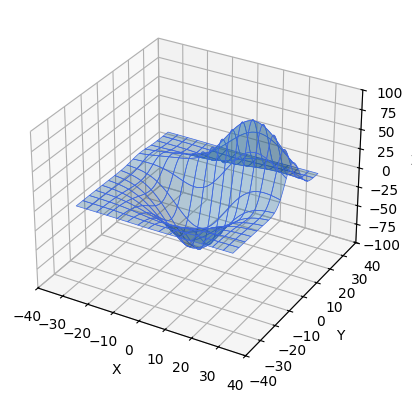

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
# ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
# ax.contour(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
# ax.contour(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

In [41]:
a = torch.tensor([ 2.6334e-05,  4.1566e-06,  8.7498e-05,  1.0083e-04,  5.1120e-05,
         1.0223e-04,  3.3792e-05,  1.0695e-04,  7.1013e-05,  1.1091e-04,
         5.1811e-05,  1.3284e-04,  1.0802e-04,  7.4881e-06,  1.2698e-04,
         1.2682e-04,  1.0134e-04,  7.8735e-05,  1.0413e-04, -1.1226e-05,
         5.1107e-05,  6.2365e-05,  2.5321e-05,  1.5365e-05,  1.1577e-04,
         8.9040e-05,  1.0258e-05,  7.0652e-05,  3.0189e-05,  4.4059e-05,
         9.1012e-05,  4.3029e-05,  7.4705e-05,  7.9663e-05,  6.4591e-05,
         8.7708e-05,  8.6665e-05,  9.6984e-05,  5.0450e-05,  1.2116e-04,
         7.6938e-05,  8.1121e-05,  9.8699e-05,  1.0159e-04,  8.1915e-05,
         7.1423e-05,  8.4561e-05,  8.8718e-05,  1.0510e-04,  1.5280e-04,
         9.9001e-05,  4.8117e-05,  9.9475e-05,  3.4699e-05,  8.4239e-05,
         4.2345e-05,  1.0974e-04,  1.5191e-05,  6.6854e-05,  1.8889e-05,
         4.5400e-05,  2.9589e-05,  5.5035e-05,  2.0311e-05,  4.1357e-05,
         2.8886e-05,  1.6235e-04,  2.9683e-05,  7.6886e-05,  8.4378e-05,
         1.0917e-04,  4.5853e-05,  3.4324e-05,  8.7669e-05,  9.2533e-05,
         1.0171e-04,  1.8552e-05,  3.0184e-05,  1.2147e-04,  1.4038e-04,
         7.8533e-05,  6.8670e-05, -1.9638e-06,  4.3618e-05,  4.7967e-05,
         9.4937e-05,  7.4856e-05,  7.7681e-05,  2.4784e-05,  1.3561e-05,
         5.8205e-05,  8.4109e-08,  5.9756e-05,  9.5086e-05,  1.6371e-04,
         8.5549e-05,  3.4177e-05,  1.1012e-04,  1.0723e-04,  4.0546e-05,
         8.6735e-05,  7.4113e-05,  6.7653e-05,  5.2472e-05,  9.6756e-05,
         5.4007e-05,  1.3269e-04,  9.3670e-05,  9.5274e-05,  2.8861e-05,
         5.4118e-05,  1.2182e-04,  1.0780e-04,  7.7659e-05,  2.7915e-05,
         2.1970e-05,  6.2158e-05,  2.0853e-05,  6.6509e-05,  6.4003e-05,
         8.9614e-05,  5.4073e-05,  1.0582e-04,  9.1320e-05,  9.7568e-05,
         7.3683e-05,  5.7643e-05,  1.0524e-04], device='cuda:0')

b = torch.tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

In [42]:
cos = nn.CosineSimilarity(dim=0, eps=1e-20)
cos(a, b)

tensor(0.0291, device='cuda:0')

In [47]:
a = None
b = 3

In [48]:
a != None

False

In [49]:
b != None

True

In [60]:
import numpy as np
from scipy.optimize import minimize

def bounded_nelder_mead(func, bounds, x0=None, options=None):
    """
    Bounded Nelder-Mead optimization using projection to keep points within bounds.
    
    Parameters:
    - func: Objective function to minimize.
    - bounds: List of (lower, upper) bounds for each variable.
    - x0: Initial starting point (optional, defaults to center of bounds).
    - options: Dictionary of options for scipy.optimize.minimize.
    
    Returns:
    - Optimization result from scipy.optimize.minimize.
    """
    
    # Define a wrapper function that projects points into bounds
    def bounded_func(x):
        x = np.clip(x, [b[0] for b in bounds], [b[1] for b in bounds])
        return func(x)
    
    # Default initial guess: middle of the bounds
    if x0 is None:
        x0 = np.array([(b[0] + b[1]) / 2 for b in bounds])
    
    # Perform optimization
    res = minimize(
        bounded_func, x0, method="CG", options=options
    )
    
    # Ensure final result respects bounds
    res.x = np.clip(res.x, [b[0] for b in bounds], [b[1] for b in bounds])
    return res

# Example objective function
def objective(x):
    a, b, c = x  # Extract variables
    return (a - 0.5)**2 + (b - 15)**2 + (c - 1.5)**2  # A sample quadratic function

# Define variable bounds: a[0,1], b[10,20], c[0,3]
bounds = [(0, 1), (10, 200), (0, 3)]

# Run optimization
result = bounded_nelder_mead(objective, bounds, options={"disp":True})

# Print result
print("Optimal solution:", result.x)
print("Objective function value:", result.fun)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 36
         Gradient evaluations: 9
Optimal solution: [ 0.49999999 15.          1.49999999]
Objective function value: 1.2489710108130293e-16


In [86]:
import numpy as np
from scipy.optimize import minimize
Nfeval = 1

def objective(x):
    a, b, c = x
    return (a - 0.5)**2 + (b - 15)**3 + (c - 1.5)**2  # Example function

def callbackF(Xi):
    global Nfeval
    print ('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}   {4: 3.6f}'.format(Nfeval, Xi[0], Xi[1], Xi[2], objective(Xi)) )
    Nfeval += 1

# Bounds for each variable: (lower, upper)
bounds = [(0, 5), (10, 90), (-4, 3)]

# Initial guess (should be within bounds)
x0 = [0.5, 85, -3.9]

# Run Powell's method with bounds
result = minimize(objective, x0, method='Powell', bounds=bounds, callback=callbackF, options={"disp":True, "return_all": True} )



# Output the result
print("Optimal solution:", result.x)
print("Function value at optimum:", result.fun)


   1    0.500000    10.000035    1.500000   -124.997370
   2    0.500000    10.000000    1.500192   -124.999991
   3    0.500000    10.000000    1.500000   -125.000000
Optimization terminated successfully.
         Current function value: -125.000000
         Iterations: 3
         Function evaluations: 243
Optimal solution: [ 0.5        10.          1.50000001]
Function value at optimum: -124.99999999967413


In [72]:
result

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.3065508742723008e-29
       x: [ 5.000e-01  1.500e+01  1.500e+00]
     nit: 2
   direc: [[ 1.000e+00  0.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00  1.000e+00]
           [-1.710e-29 -1.943e-15  1.249e-16]]
    nfev: 101
 allvecs: [array([ 5.000e-01,  8.500e+01, -3.000e+00]), array([ 5.000e-01,  1.500e+01,  1.500e+00]), array([ 5.000e-01,  1.500e+01,  1.500e+00])]

In [77]:
import numpy as np
from scipy.optimize import fmin_bfgs

Nfeval = 1

def rosen(X): #Rosenbrock function
    return (1.0 - X[0])**2 + 100.0 * (X[1] - X[0]**2)**2 + \
           (1.0 - X[1])**2 + 100.0 * (X[2] - X[1]**2)**2

def callbackF(Xi):
    global Nfeval
    print ('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}   {4: 3.6f}'.format(Nfeval, Xi[0], Xi[1], Xi[2], rosen(Xi)) )
    Nfeval += 1

print ('{0:4s}   {1:9s}   {2:9s}   {3:9s}   {4:9s}'.format('Iter', ' X1', ' X2', ' X3', 'f(X)') )   
x0 = np.array([1.1, 1.1, 1.1], dtype=np.double)
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    fmin_bfgs(rosen, 
              x0, 
              callback=callbackF, 
              maxiter=2000, 
              full_output=True, 
              retall=False)

Iter    X1          X2          X3         f(X)     
   1    1.022987    1.057849    1.134862    0.041767
   2    1.022371    1.058610    1.134477    0.040907
   3    1.012026    1.031387    1.070837    0.011310
   4    0.997529    0.996771    0.993285    0.000315
   5    0.997469    0.995079    0.990240    0.000033
   6    0.998048    0.996186    0.992605    0.000024
   7    0.998769    0.997551    0.995328    0.000012
   8    0.999992    0.999948    0.999974    0.000001
   9    1.000043    1.000076    1.000170    0.000000
  10    1.000001    1.000003    1.000006    0.000000
  11    1.000000    1.000001    1.000001    0.000000
  12    1.000000    0.999999    0.999998    0.000000
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 232
         Gradient evaluations: 55


/ntuzfs/liyang/miniconda3/envs/fl310/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1313: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


In [88]:
from scipy.optimize._optimize import _minimize_powell
print(inspect.getsource(_minimize_powell))



def _minimize_powell(func, x0, args=(), callback=None, bounds=None,
                     xtol=1e-4, ftol=1e-4, maxiter=None, maxfev=None,
                     disp=False, direc=None, return_all=False,
                     **unknown_options):
    """
    Minimization of scalar function of one or more variables using the
    modified Powell algorithm.

    Parameters
    ----------
    fun : callable
        The objective function to be minimized::

            fun(x, *args) -> float

        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        The prese

In [100]:
import numpy as np
from scipy.optimize import OptimizeResult, minimize_scalar

def objective(x):
    a, b, c = x
    return (a - 0.5)**2 + (b - 15)**4 + (c - 1.5)**2  # Example function

# Bounds for each variable: (lower, upper)
bounds = [(0, 1), (10, 200), (0, 3)]

# Initial guess (should be within bounds)
x0 = np.array([0.7, 199, 1])

def powell_stepwise(func, x0, bounds, tol=1e-6, max_iter=100):
    """ Powell's method step-by-step for delayed objective evaluation. """
    n = len(x0)
    directions = np.eye(n)  # Initial set of directions
    x = x0.copy()
    iteration = 0
    
    while iteration < max_iter:
        print("iter", iteration)
        x_old = x.copy()
        for i in range(n):
            def line_search(alpha):
                xi = x + alpha * directions[i]
                xi = np.clip(xi, [b[0] for b in bounds], [b[1] for b in bounds])
                return func(xi)
            
            res = minimize_scalar(line_search, method='Brent')
            alpha_opt = res.x if res.success else 0
            x = x + alpha_opt * directions[i]
            x = np.clip(x, [b[0] for b in bounds], [b[1] for b in bounds])
            print("x", x)
        new_direction = x - x_old
        if np.linalg.norm(new_direction) < tol:
            break
        
        directions = np.roll(directions, -1, axis=0)
        directions[-1] = new_direction / np.linalg.norm(new_direction) if np.linalg.norm(new_direction) > 0 else directions[-1]
        iteration += 1
        yield OptimizeResult(x=x, success=False, nit=iteration)
    
    yield OptimizeResult(x=x, success=True, nit=iteration)

# Example usage:
powell_iter = powell_stepwise(objective, x0, bounds)
for step in powell_iter:
    print("Step:", step.nit, "Current x:", step.x)


iter 0
x [  0.50000002 199.           1.        ]
x [ 0.50000002 10.          1.        ]
x [ 0.50000002 10.          1.49999981]
Step: 1 Current x: [ 0.50000002 10.          1.49999981]
iter 1
x [ 0.50000002 14.99999995  1.49999981]
x [ 0.50000002 14.99999995  1.5       ]
x [ 0.50000002 14.99999704  1.50000001]
Step: 2 Current x: [ 0.50000002 14.99999704  1.50000001]
iter 2
x [ 0.50000002 14.99999704  1.5       ]
x [ 0.50000002 14.99999454  1.50000001]
x [ 0.50000002 14.99999501  1.50000001]
Step: 3 Current x: [ 0.50000002 14.99999501  1.50000001]
iter 3
x [ 0.50000002 14.99999501  1.50000001]
x [ 0.50000002 14.99999502  1.50000001]
x [ 0.5       14.9999823  1.5      ]
Step: 4 Current x: [ 0.5       14.9999823  1.5      ]
iter 4
x [ 0.5       15.0000003  1.5      ]
x [ 0.5       15.0000003  1.5      ]
x [ 0.5       15.0000003  1.5      ]
Step: 5 Current x: [ 0.5       15.0000003  1.5      ]
iter 5
x [ 0.5       15.0000003  1.5      ]
x [ 0.5       15.0000003  1.5      ]
x [ 0.5       

In [94]:
powell_iter

<generator object powell_stepwise at 0x73b7327f0c80>

In [101]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [1]:
hp_models = {"ConvNet" : 100}
model_names = [model_name for model_name, k in hp_models.items() for _ in range(k)]

In [3]:
len(model_names)

100

In [5]:
a = {0: "E"}

In [6]:
a.items()

dict_items([(0, 'E')])